In [ ]:
# Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the csv files in pandas dataframe
dataset=pd.read_csv('C:/JS/Case-Study-ML-Models/Moblie_Price.csv')

In [3]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
dataset.head().T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


In [4]:
dataset.shape  # 2000 records and 21 Features ( including the price_range)

(2000, 21)

In [6]:
dataset.info()  # To check the datatype and null/non-null values in every column  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
# Summary statistics 
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
# How many unique values are present in target variable 
dataset.price_range.nunique()

# 4 Unique values of target variable 
# There are 4 classes in the targer variable 
# Multi-class classification model 

4

In [9]:
# What are these 4 classes 
dataset.price_range.unique()

# 0 => Low Price mobile ( < 10k )
# 1 => Medium Price Mobile ( 10k to 20 k )
# 2 => High Price Mobile ( 20k to 30k)
# 3 => Very high Price mobiles ( > 30k)

array([1, 2, 3, 0], dtype=int64)

In [10]:
# Number of records per class in the dataframe 
dataset.price_range.value_counts()

# Problem which may come here 
# very less records for one or many classes ( class imbalance problem)

# H.W => How to treate the class imbalance problem. - SMOTE 
# In a binary classification problem 
# If one class in having less than 5% of contriution - Minority Class ( should be treated for class imbalace)

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

C:\Users\anparash\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

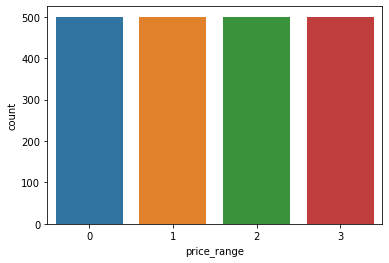

In [11]:
# Plot of different classes 
sns.countplot(dataset['price_range'])

Text(0.5, 1.0, 'Correlation across features')

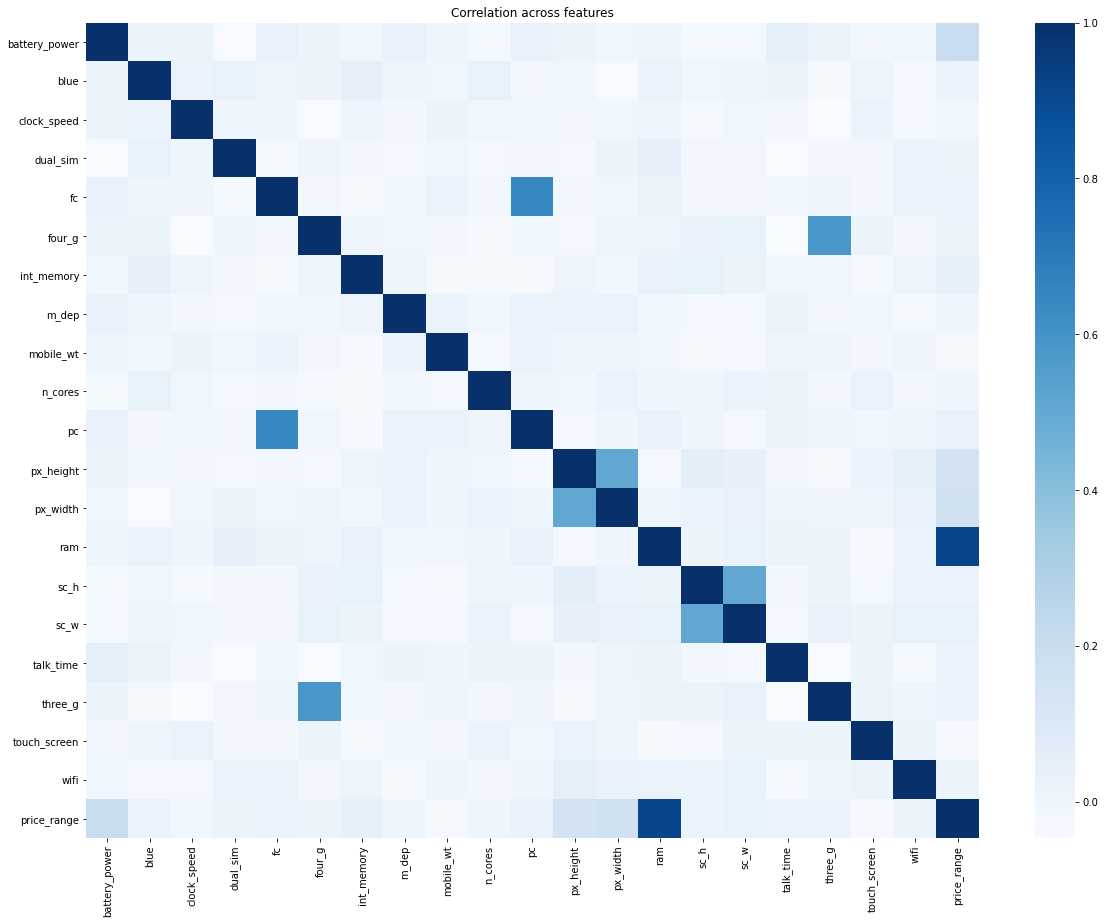

In [14]:
# Correlation between features 
corr=dataset.corr()
corr 

fig = plt.figure(figsize= (20,15))
x1 = sns.heatmap(corr, cmap = "Blues")
x1.set_title("Correlation across features")

In [19]:
corr.sort_values(by=["price_range"],ascending=False).iloc[0] # First record of correlation matrix 

battery_power   -0.000653
blue             0.026351
clock_speed      0.003443
dual_sim         0.041072
fc               0.015099
four_g           0.007313
int_memory       0.032813
m_dep           -0.009434
mobile_wt       -0.002581
n_cores          0.004868
pc               0.028984
px_height       -0.020352
px_width         0.004105
ram              1.000000
sc_h             0.015996
sc_w             0.035576
talk_time        0.010820
three_g          0.015795
touch_screen    -0.030455
wifi             0.022669
price_range      0.917046
Name: ram, dtype: float64

In [16]:
# Check the correlation with respect to our target variable 
corr.sort_values(by=["price_range"],ascending=False).iloc[0]

# Let's sort it also 
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

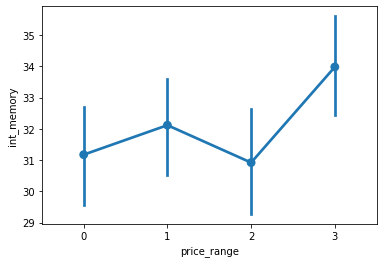

In [17]:
# Impact of internal memory on the phone price 
sns.pointplot(y="int_memory", x="price_range", data=dataset)

In [21]:
dataset.int_memory.describe()

count    2000.000000
mean       32.046500
std        18.145715
min         2.000000
25%        16.000000
50%        32.000000
75%        48.000000
max        64.000000
Name: int_memory, dtype: float64

In [23]:
dataset.battery_power.describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

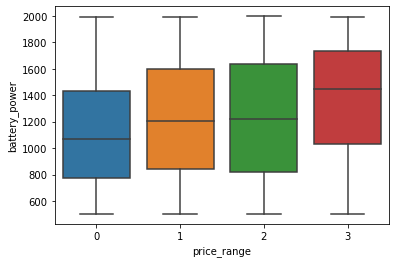

In [24]:
# Relationship between the battery Power and price Range 
sns.boxplot(x="price_range", y="battery_power", data=dataset)

Text(0.5, 0, 'MegaPixels')

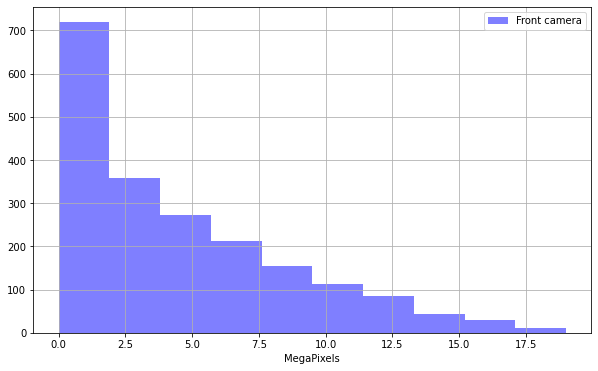

In [25]:
# Number of records by front camera quality 
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
plt.legend()
plt.xlabel('MegaPixels')

Text(0.5, 0, 'MegaPixels')

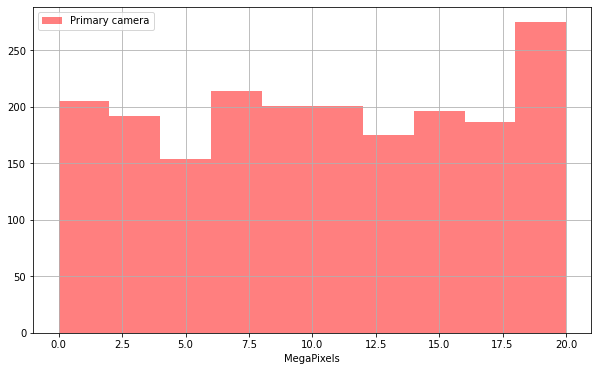

In [26]:
# Number of records by primary camera quality 
plt.figure(figsize=(10,6))
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

Text(0.5, 0, 'MegaPixels')

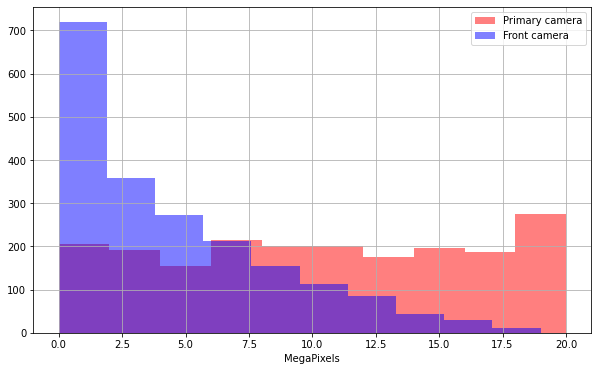

In [27]:
# Comparing front and primary camera disrtibution 
plt.figure(figsize=(10,6))
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
plt.legend()
plt.xlabel('MegaPixels')

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

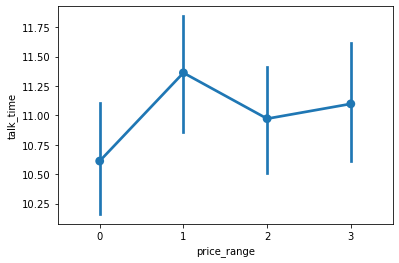

In [28]:
# Relationship between talk time and price range 
sns.pointplot(y="talk_time", x="price_range", data=dataset)

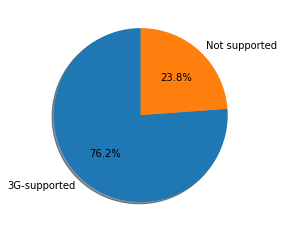

In [29]:
# Pie chart of 3G supported phones 
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values
values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

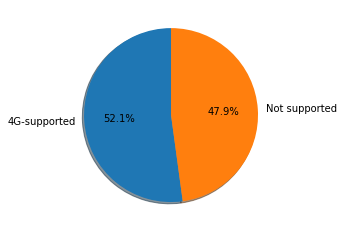

In [30]:
# Pie chart of 4G supported phones 
labels = ["4G-supported",'Not supported']
values=dataset['four_g'].value_counts().values
values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

### Model Building 

In [31]:
# Dropping the target variable
X=dataset.drop('price_range',axis=1)
# Feature space 

In [32]:
y=dataset['price_range']

In [33]:
from sklearn.model_selection import train_test_split

In [36]:
# Train and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Random state will help you to produce the same set of train and test set again 

In [37]:
# set [ 5, 10, 15, 1, 4, 3, 10, 19, 20]

In [38]:
# Give me any 3 numbers 
# set1[ 10, 19, 20]  , Sample Anil ( 1001) # Random state you fix which records you want in sample 
# set2[ 5, 3, 10]    , Sample Kartik ( 99)
# set3[10, 19, 20]   , Sample Aman  ( 101)

In [39]:
# Decision Tree model Building 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [40]:
# Fitting tree model 
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#!pip install pydotplus  # Need this python lib for Decision Tree Visualization 

In [41]:
#https://graphviz.gitlab.io/_pages/Download/Download_windows.html
import pydotplus, os
data_dir = "C:/JS/Case-Study-ML-Models/"
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
os.chdir(data_dir)

In [42]:
import sklearn.tree as tree

In [43]:
dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1", "2", "3"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [44]:
graph = pydotplus.graph_from_dot_data(dot_data)

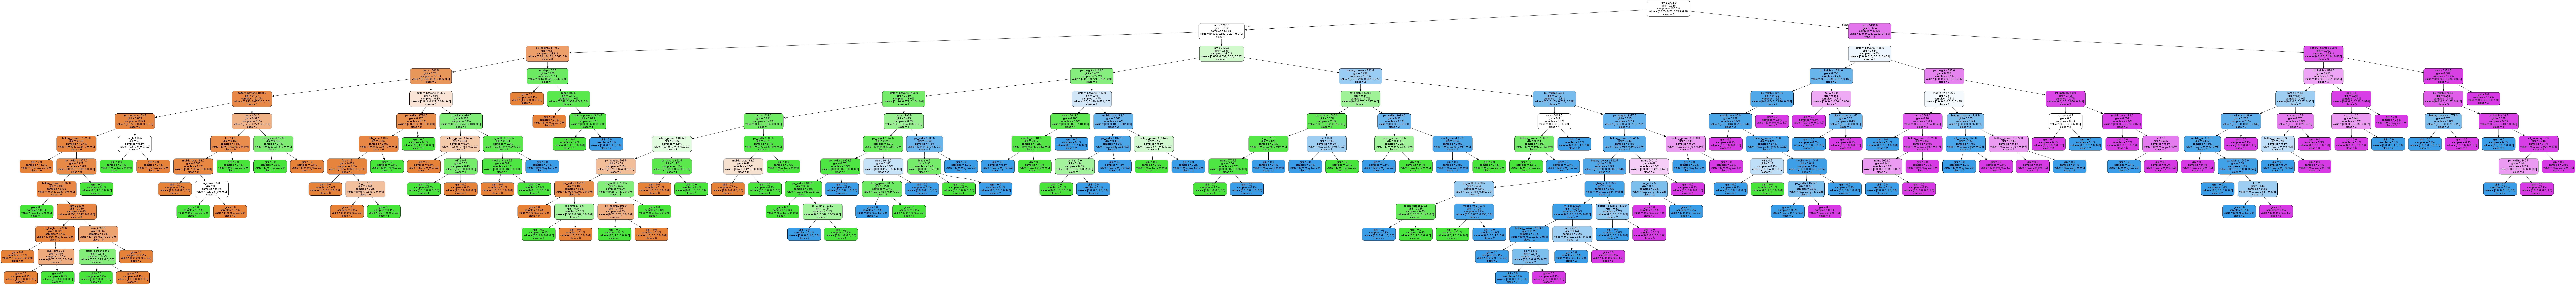

In [45]:
from IPython.display import Image

Image(graph.create_png())

#Image(filename='test.png') 

In [47]:
#!pip install graphviz
import graphviz
from graphviz import Source

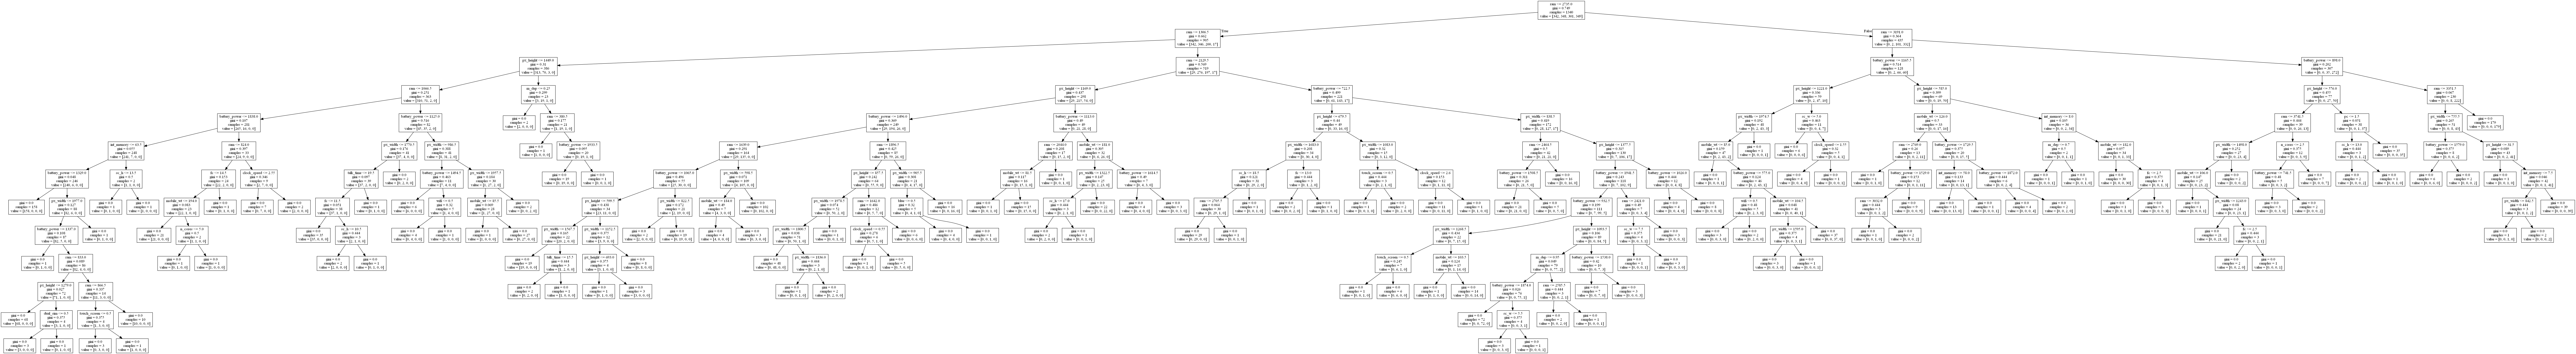

In [48]:
# You are saving the decision tree as a png file in local system
graph = Source( tree.export_graphviz(dtree, out_file=None, feature_names=X.columns))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

In [ ]:
dtree.score(X_test,y_test)

In [49]:
# Let's try to predict the test dataset 
predictions=dtree.predict(X_test)

In [50]:
predictions

array([1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 2, 1, 1, 3, 0,
       2, 3, 2, 2, 2, 1, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 2, 1, 2, 3, 2,
       3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 3, 2, 0, 3, 3, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 3, 0, 2, 0, 3, 2, 0, 2, 3, 0, 2, 3, 3, 0, 3, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 2, 2, 3, 1, 0, 3, 3, 1, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       1, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 0, 0, 0, 1, 2, 3, 0, 3, 1, 3, 2,
       3, 2, 2, 1, 3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 2, 2, 1, 1, 0, 1, 3, 3, 1, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0, 1, 1, 3, 2, 0, 3, 0, 3, 2, 2, 2, 1, 1, 3, 0, 3, 0, 0, 3, 1,
       1, 2, 3, 0, 2, 3, 3, 0, 3, 1, 1, 1, 0, 2, 1, 3, 1, 3, 2, 0, 1, 2,
       1, 3, 0, 3, 3, 2, 3, 3, 1, 2, 1, 1, 3, 2, 1, 2, 0, 1, 2, 3, 3, 0,
       1, 0, 2, 1, 0, 2, 3, 1, 3, 2, 1, 2, 1, 2, 1, 3, 2, 3, 2, 2, 3, 2,
       2, 2, 2, 3, 2, 3, 0, 1, 1, 0, 2, 1, 0, 2, 2,

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
# Create a confusion matrix 
# Actual classes and the predicted classes 
conf_matrix = confusion_matrix(y_test,predictions)
conf_matrix

array([[138,  20,   0,   0],
       [ 15, 116,  21,   0],
       [  0,  20, 147,  32],
       [  0,   0,  15, 136]], dtype=int64)

In [53]:
# To visualize the confusion matrix
#!pip install mlxtend

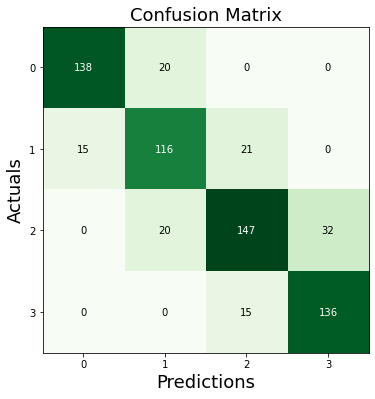

In [54]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [55]:
dtree.score(X_test, y_test) # Accuracy is ~ 82 % on the test dataset 

0.8136363636363636

### ROC Plot

In [56]:
# For ROC Plot you need the predicted prob 
y_probas = dtree.predict_proba(X_test)

In [57]:
y_probas

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

C:\Users\anparash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


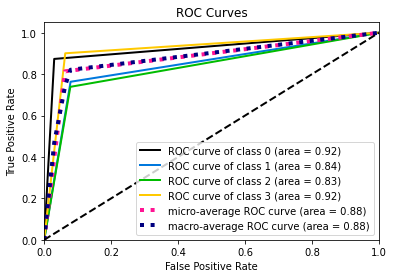

In [58]:
#!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

### Hyper Parameter Tuning 

In [59]:
tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [60]:
from sklearn.model_selection import GridSearchCV
clf_rfc = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)

In [61]:
clf_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [62]:
# Tell me the best parameter out of all that were used in parameter tuning 
clf_rfc.best_params_

{'criterion': 'gini', 'max_depth': 120}

In [63]:
# Do the prediction with  the best Hyper Para set 
pred1 = clf_rfc.predict(X_test)

In [64]:
conf_matrix = confusion_matrix(y_test,pred1)
conf_matrix

array([[138,  20,   0,   0],
       [ 15, 116,  20,   1],
       [  0,  20, 150,  29],
       [  0,   0,  12, 139]], dtype=int64)

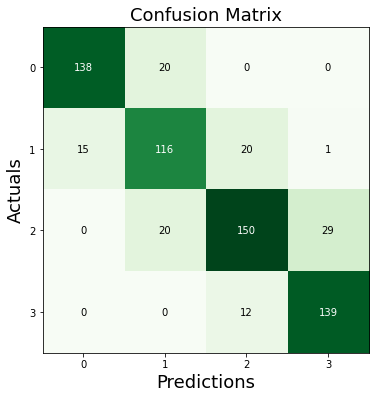

In [65]:
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [66]:
# Accuracy of test dataset when created with the the help of best feature set. Is it better ?
clf_rfc.score(X_test, y_test)

0.8227272727272728

# Random Forest 

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [68]:
rfc.score(X_test,y_test)  # Default accuracy on the RF classifier is 88% 

0.8803030303030303

In [69]:
predictions1 = rfc.predict(X_test)

In [70]:
conf_matrix = confusion_matrix(y_test,predictions1)
conf_matrix

array([[150,   8,   0,   0],
       [ 10, 138,   4,   0],
       [  0,  24, 150,  25],
       [  0,   0,   8, 143]], dtype=int64)

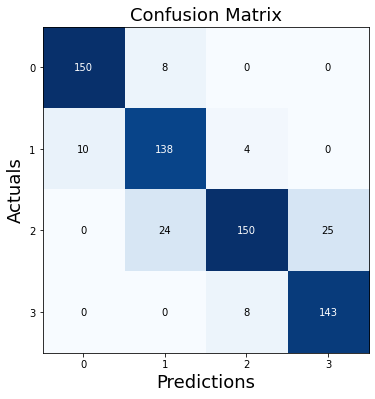

In [71]:
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [72]:
# ROC Plot with Random Forest
y_probas1 = rfc.predict_proba(X_test)

C:\Users\anparash\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


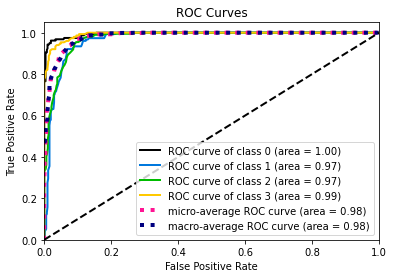

In [73]:
skplt.metrics.plot_roc_curve(y_test, y_probas1)
plt.show()

In [74]:
for w in range(10,300,20):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators = '+str(w))
    print ('OOB score is '+str(oob))
    print ('************************')

C:\Users\anparash\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\anparash\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


For n_estimators = 10
OOB score is 0.6888059701492537
************************
For n_estimators = 30
OOB score is 0.7940298507462686
************************
For n_estimators = 50
OOB score is 0.8261194029850746
************************
For n_estimators = 70
OOB score is 0.8350746268656717
************************
For n_estimators = 90
OOB score is 0.8477611940298507
************************
For n_estimators = 110
OOB score is 0.8402985074626865
************************
For n_estimators = 130
OOB score is 0.8529850746268657
************************
For n_estimators = 150
OOB score is 0.8574626865671642
************************
For n_estimators = 170
OOB score is 0.85
************************
For n_estimators = 190
OOB score is 0.8611940298507462
************************
For n_estimators = 210
OOB score is 0.8582089552238806
************************
For n_estimators = 230
OOB score is 0.8641791044776119
************************
For n_estimators = 250
OOB score is 0.8619402985074627
****

### Validation dataset

In [75]:
data_test = pd.read_csv("C:/JS/Case-Study-ML-Models/Moblie_Price_Test.csv")

In [76]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [77]:
# Get rid of ID column 
data_test1 = data_test.drop('id', axis=1)

In [78]:
data_test1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [79]:
# Predict values from decision tree model 
Predicted_Price = dtree.predict(data_test1)

In [81]:
#Predicted_Price

In [ ]:
# Prdicted Price from Decision tree lets append them in validation set 

In [82]:
data_test["Price_Range_DecisionTree"] = Predicted_Price

In [83]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price_Range_DecisionTree
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,3
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1


In [84]:
# Do prediction from Random Forest and attach that column in the Validation set 
data_test["Price_Range_RandomForest"] = rfc.predict(data_test1)

In [85]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price_Range_DecisionTree,Price_Range_RandomForest
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,1412,3476,12,7,2,0,1,0,3,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,857,3895,6,0,7,1,0,0,3,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1366,2396,17,10,10,0,1,1,3,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,1752,3893,10,0,7,1,1,0,3,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,810,1773,15,8,7,1,0,1,1,1


In [86]:
data_test["Price_Range_XGBoost"] = rfc.predict(data_test1)

In [87]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price_Range_DecisionTree,Price_Range_RandomForest,Price_Range_XGBoost
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,3476,12,7,2,0,1,0,3,3,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,3895,6,0,7,1,0,0,3,3,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,2396,17,10,10,0,1,1,3,2,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,3893,10,0,7,1,1,0,3,3,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,1773,15,8,7,1,0,1,1,1,1


In [ ]:
clf=RandomForestClassifier(n_estimators=190,oob_score=True,n_jobs=-1,random_state=400)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
clf.oob_score_

In [ ]:
clf.feature_importances_

In [ ]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [ ]:
imp_feat.sort_values(ascending=False)

In [ ]:
imp_feat.sort_values(ascending=False).plot(kind='bar')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
models = {'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier()}

In [ ]:
def score_of_model(models,X_train,X_test,y_train,y_test):
    np.random.seed(0)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [ ]:
model_score = score_of_model(models,X_train,X_test,y_train,y_test)

In [ ]:
cm = sns.color_palette('coolwarm',as_cmap=True)
score = model_score.style.background_gradient(cmap=cm)
score